In [9]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
# Load the dataset into a DataFrame
df = pd.read_excel('Data3.xlsx')

# Display the first few rows of the dataset
display(df.head())

,gender,birthday,examination date,height,weight,spherical refraction of right eye,spherical refraction of left eye,cylinder refraction of right eye,cylinder refraction of left eye,axis of right eye,axis of left eye,AL of right eye,AL of left eye
0,female,2006,2014,123.0,28.8,-0.50,0.50,-1,-0.5,1,155,22.38,21.56
1,female,2006,2014,133.0,37.9,0.12,0.62,-2.87,-1.37,180,178,23.04,22.91
2,male,2006,2014,119.5,21.4,-0.25,-0.50,-0.25,-0.5,144,71,22.83,22.72
3,male,2006,2014,122.5,23.5,0.25,0.00,-1,-0.75,62,96,23.77,23.7
4,female,2006,2014,128.0,27.7,-0.12,-0.25,-1,-0.87,7,168,22.67,22.39


In [10]:
# Check the shape of the dataset
print("Shape of the dataset: ", df.shape)

# Check the data types of each column
print("Data types of each column: ")
print(df.dtypes)

# Check for missing values
print("Missing values: ")
print(df.isnull().sum())

# Check basic statistics of numerical columns
print("Basic statistics of numerical columns: ")
print(df.describe())

# Check unique values in categorical columns
print("Unique values in categorical columns: ")
print(df['gender'].value_counts())


Shape of the dataset:  (2024, 13)
Data types of each column: 
gender                                object
birthday                               int64
examination date                       int64
height                               float64
weight                               float64
spherical refraction of right eye    float64
spherical refraction of left eye     float64
cylinder refraction of right eye      object
cylinder refraction of left eye       object
axis of right eye                     object
axis of left eye                      object
AL of right eye                       object
AL of left eye                        object
dtype: object
Missing values: 
gender                                0
birthday                              0
examination date                      0
height                                1
weight                                1
spherical refraction of right eye     8
spherical refraction of left eye      7
cylinder refraction of right eye      7
cy

In [11]:


# Check for missing values
print("Missing values before data cleaning: ")
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Drop rows with blank values
df.dropna(subset=['gender', 'birthday', 'examination date'], how='all', inplace=True)

# Drop rows with "/" as the value
df.replace("/", float('nan'), inplace=True)
df.dropna(inplace=True)

# Convert birthday and examination_date columns to datetime data type
df['birthday'] = pd.to_datetime(df['birthday'])
df['examination date'] = pd.to_datetime(df['examination date'])

# Convert height, weight, and other relevant columns to numeric data type
numeric_cols = ['height', 'weight', 'spherical refraction of right eye', 'spherical refraction of left eye',
                'cylinder refraction of right eye', 'cylinder refraction of left eye', 'axis of right eye', 'axis of left eye',
                'AL of right eye', 'AL of left eye']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Check for missing values after data cleaning
print("Missing values after data cleaning: ")
print(df.isnull().sum())

# Check the cleaned dataset
print("Cleaned dataset: ")
print(df.head())


Missing values before data cleaning: 
gender                                0
birthday                              0
examination date                      0
height                                1
weight                                1
spherical refraction of right eye     8
spherical refraction of left eye      7
cylinder refraction of right eye      7
cylinder refraction of left eye       8
axis of right eye                    48
axis of left eye                     60
AL of right eye                       1
AL of left eye                        1
dtype: int64
Missing values after data cleaning: 
gender                               0
birthday                             0
examination date                     0
height                               0
weight                               0
spherical refraction of right eye    0
spherical refraction of left eye     0
cylinder refraction of right eye     0
cylinder refraction of left eye      0
axis of right eye                    1
ax

In [12]:
# Inspect the dataset
df.info()          # Get information about the dataset
df.head()          # Display the first few rows of the dataset
df.describe()      # Get summary statistics for numerical variables
df.isnull().sum()  # Check for missing values in each column
df.duplicated().sum()  # Check for duplicate rows


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1724 entries, 0 to 2023
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   gender                             1724 non-null   object        
 1   birthday                           1724 non-null   datetime64[ns]
 2   examination date                   1724 non-null   datetime64[ns]
 3   height                             1724 non-null   float64       
 4   weight                             1724 non-null   float64       
 5   spherical refraction of right eye  1724 non-null   float64       
 6   spherical refraction of left eye   1724 non-null   float64       
 7   cylinder refraction of right eye   1724 non-null   float64       
 8   cylinder refraction of left eye    1724 non-null   float64       
 9   axis of right eye                  1723 non-null   float64       
 10  axis of left eye                   1

11

AttributeError: module 'matplotlib' has no attribute 'title'

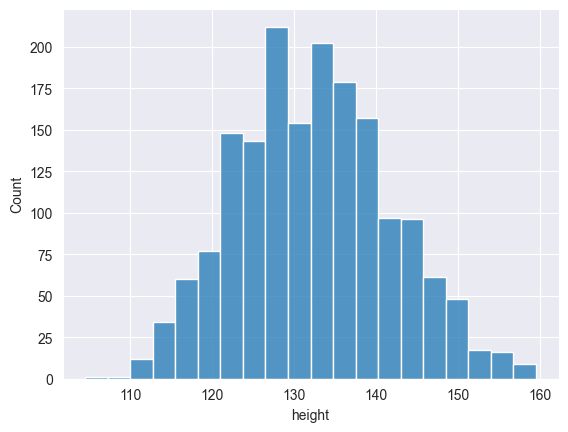

In [13]:
# Create a histogram of height
sns.histplot(df['height'], bins=20)
plt.title('Distribution of Height')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.show()

# Create a scatter plot of weight vs. height with gender as hue
sns.scatterplot(x='weight', y='height', hue='gender', data=df)
plt.title('Weight vs. Height')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.show()

# Create a box plot of spherical refraction of right eye by gender
sns.boxplot(x='gender', y='spherical refraction of right eye', data=df)
plt.title('Spherical Refraction (Right Eye) by Gender')
plt.xlabel('Gender')
plt.ylabel('Spherical Refraction (D)')
plt.show()

# Create a line chart of age vs. AL of right eye with visual impairment as hue
sns.lineplot(x='birthday', y='AL of right eye', data=df)
plt.title('Age vs. Axial Length (Right Eye) with Visual Impairment')
plt.xlabel('Age (years)')
plt.ylabel('Axial Length (mm)')
plt.show()


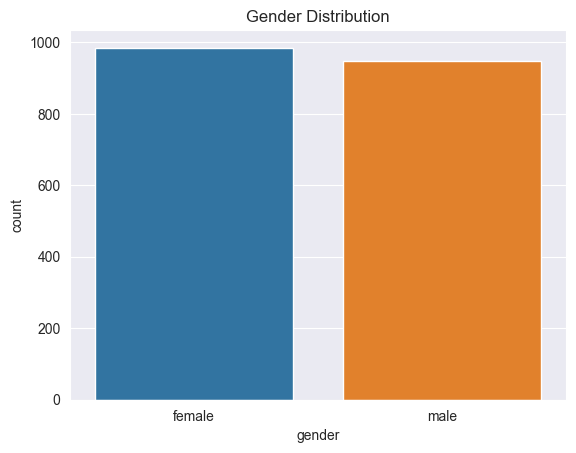

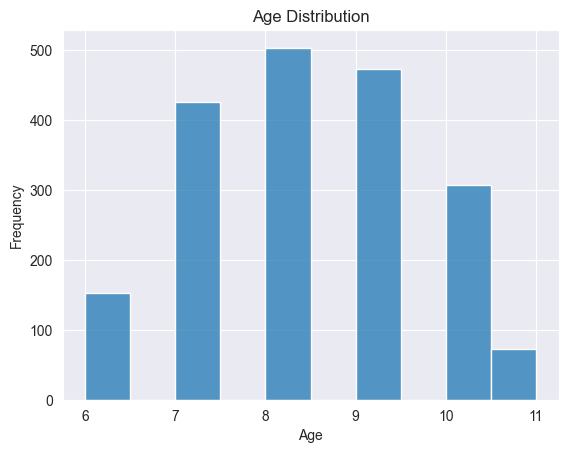

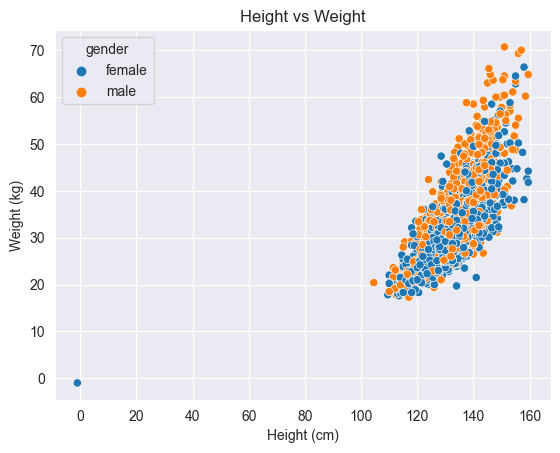

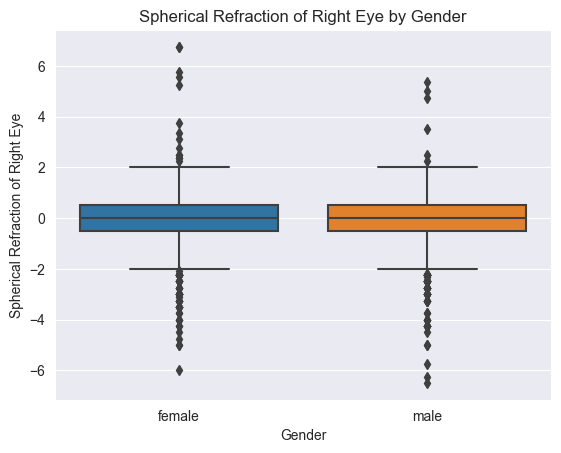

T-statistic for spherical refraction of right eye between male and female: -0.34323138418594346
P-value for spherical refraction of right eye between male and female: 0.7314617781585366
T-statistic for height between male and female: 2.6679168018999957
P-value for height between male and female: 0.007696159510815454
T-statistic for weight between male and female: 8.318201151493149
P-value for weight between male and female: 1.665525843823618e-16


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Load the dataset into a pandas DataFrame
df = pd.read_excel('Data3.xlsx')

# Drop rows with missing values or blank rows
df.dropna(inplace=True)

# Convert "birthday" column to datetime

# Extract year of birth from "birthday" column
df['year_of_birth'] = df['birthday']

# Calculate age at examination date
type(df['examination date'])
df['age'] = df['examination date'] - df['year_of_birth']

# Drop unnecessary columns
df.drop(['birthday', 'year_of_birth'], axis=1, inplace=True)

# Explore data using visualizations

# Bar chart of gender distribution
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

# Histogram of age distribution
sns.histplot(x='age', data=df, bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of height vs weight
sns.scatterplot(x='height', y='weight', data=df, hue='gender')
plt.title('Height vs Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

# Box plot of spherical refraction of right eye by gender
sns.boxplot(x='gender', y='spherical refraction of right eye', data=df)
plt.title('Spherical Refraction of Right Eye by Gender')
plt.xlabel('Gender')
plt.ylabel('Spherical Refraction of Right Eye')
plt.show()

# Conduct statistical analysis

# Perform t-test for spherical refraction of right eye between male and female
male_data = df[df['gender'] == 'male']
female_data = df[df['gender'] == 'female']
t_stat, p_value = ttest_ind(male_data['spherical refraction of right eye'], female_data['spherical refraction of right eye'])
print('T-statistic for spherical refraction of right eye between male and female:', t_stat)
print('P-value for spherical refraction of right eye between male and female:', p_value)

# Perform t-test for height between male and female
t_stat, p_value = ttest_ind(male_data['height'], female_data['height'])
print('T-statistic for height between male and female:', t_stat)
print('P-value for height between male and female:', p_value)

# Perform t-test for weight between male and female
t_stat, p_value = ttest_ind(male_data['weight'], female_data['weight'])
print('T-statistic for weight between male and female:', t_stat)
print('P-value for weight between male and female:', p_value)

# Perform t-test for AL of right eye between male and female
t_stat, p_value = ttest_ind((male_data['AL of right eye']),female_data['AL of right eye'])
print('T-statistic for AL of right eye between male and female:', t_stat)
print('P-value for AL of right eye between male and female:', p_value)

# Perform additional analysis as needed, such as filtering, sorting, or aggregating data, to extract relevant insights or comparisons

